In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import plot_utils

# Mistral E2E

## Toolbench dataset

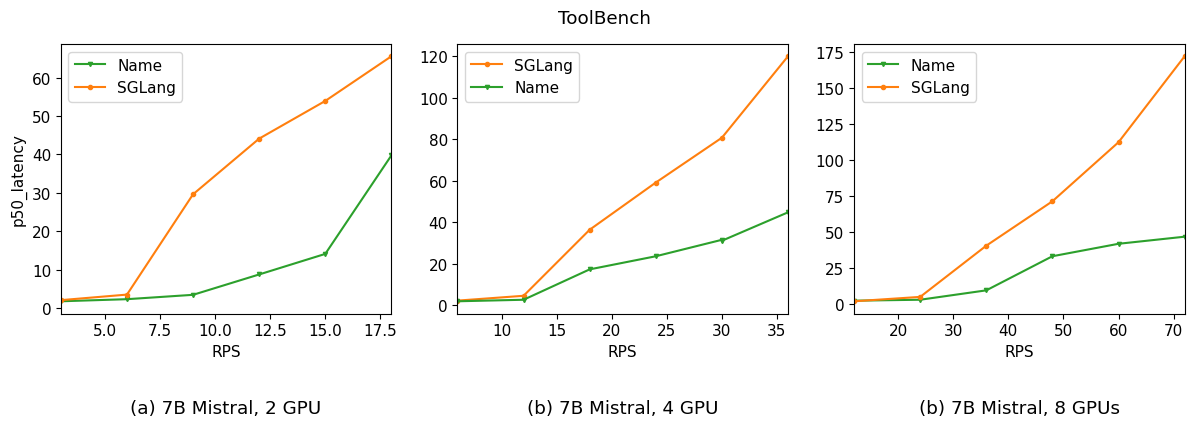

In [2]:
fig, ax = plt.subplots(1, 3, figsize=(14.5, 3.5))
y_column = 'p50_latency'

df_2r = plot_utils.read_e2e_csv_metrics('/mnt/ssd1/alm-os/sglang_multi_model/e2e/2r_toolbench_fix_ref_cnt/exp.csv')
for name, group in df_2r:
    ax[0].plot(group['rps'], group[y_column],
               **plot_utils.policy_mapping[':'.join(name)])
    ax[0].set_xlim(3, 18)
    ax[0].set_xlabel('RPS')
    ax[0].legend()
    ax[0].set_title('(a) 7B Mistral, 2 GPU', y=-0.4)
    
df_4r = plot_utils.read_e2e_csv_metrics(['/mnt/ssd1/alm-os/sglang_multi_model/e2e/4r_test_toolbench_multi_exp/exp.csv'])
for name, group in df_4r:
    if name != ('ROUND_ROBIN', ''):
        continue
    ax[1].plot(group['rps'], group[y_column],
               **plot_utils.policy_mapping[':'.join(name)])
    ax[1].set_xlim(6, 36)
    ax[1].set_xlabel('RPS')
    ax[1].legend()
    ax[1].set_title('(b) 7B Mistral, 4 GPU', y=-0.4)
    
df_4r_ours = plot_utils.read_e2e_csv_metrics(['/mnt/ssd1/alm-os/sglang_multi_model/e2e/4r_test_toolbench_multi_exp_steal_heavy/exp.csv', '/mnt/ssd1/alm-os/sglang_multi_model/e2e/4r_test_toolbench_multi_exp_steal_heavy_last2/exp.csv'])
for name, group in df_4r_ours:
    ax[1].plot(group['rps'], group[y_column],
               **plot_utils.policy_mapping[':'.join(name)])
    ax[1].set_xlim(6, 36)
    ax[1].set_xlabel('RPS')
    ax[1].legend()
    ax[1].set_title('(b) 7B Mistral, 4 GPU', y=-0.4)
    
df_8r = plot_utils.read_e2e_csv_metrics(['/mnt/ssd1/alm-os/sglang_multi_model/e2e/8r_test_toolbench_multi_exp/exp.csv'])
for name, group in df_8r:
    ax[2].plot(group['rps'], group[y_column],
               **plot_utils.policy_mapping[':'.join(name)])
    ax[2].set_xlim(12, 72)
    ax[2].set_xlabel('RPS')
    ax[2].legend()
    ax[2].set_title('(b) 7B Mistral, 8 GPUs', y=-0.4)
    
ax[0].set_ylabel(y_column)
fig.suptitle('ToolBench')
plt.show()

## Loogle

Text(0, 0.5, 'p50_norm_latency')

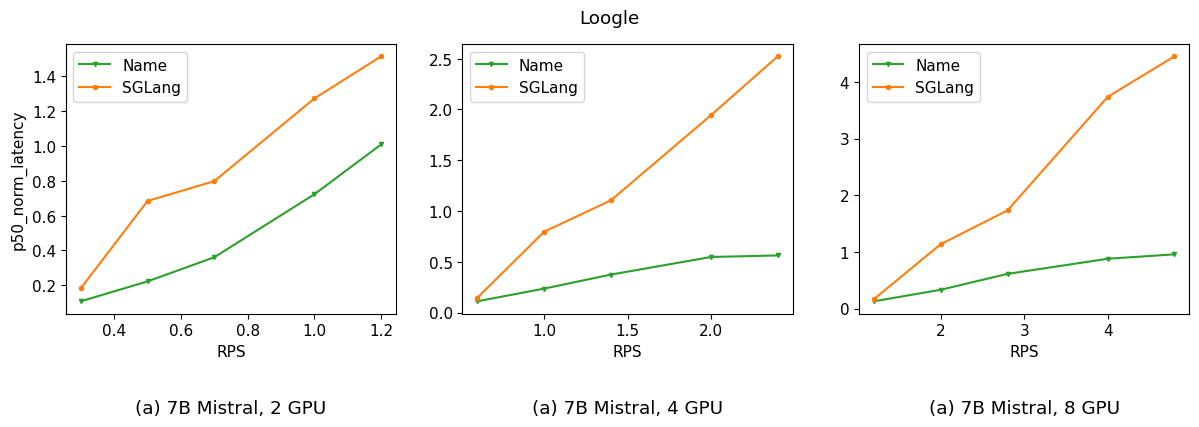

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(14.5, 3.5))
y_column = 'p50_norm_latency'

df_2r = plot_utils.read_e2e_csv_metrics(['/mnt/ssd1/alm-os/sglang_multi_model/e2e/2r_loogle_rich/exp.csv', '/mnt/ssd1/alm-os/sglang_multi_model/logs/debug_loogle/exp.csv'])
for name, group in df_2r:
    ax[0].plot(group['rps'], group[y_column],
               **plot_utils.policy_mapping[':'.join(name)])
    # ax[0].set_xlim(3, 18)
    ax[0].set_xlabel('RPS')
    ax[0].legend()
    ax[0].set_title('(a) 7B Mistral, 2 GPU', y=-0.4)
    
df_4r = plot_utils.read_e2e_csv_metrics('/mnt/ssd1/alm-os/sglang_multi_model/e2e/4r_loogle_rich/exp.csv')
for name, group in df_4r:
    ax[1].plot(group['rps'], group[y_column],
               **plot_utils.policy_mapping[':'.join(name)])
    # ax[0].set_xlim(3, 18)
    ax[1].set_xlabel('RPS')
    ax[1].legend()
    ax[1].set_title('(a) 7B Mistral, 4 GPU', y=-0.4)
    
df_8r = plot_utils.read_e2e_csv_metrics('/mnt/ssd1/alm-os/sglang_multi_model/e2e/8r_loogle_rich/exp.csv')
for name, group in df_8r:
    ax[2].plot(group['rps'], group[y_column],
               **plot_utils.policy_mapping[':'.join(name)])
    # ax[0].set_xlim(3, 18)
    ax[2].set_xlabel('RPS')
    ax[2].legend()
    ax[2].set_title('(a) 7B Mistral, 8 GPU', y=-0.4)

fig.suptitle('Loogle')
ax[0].set_ylabel(y_column)

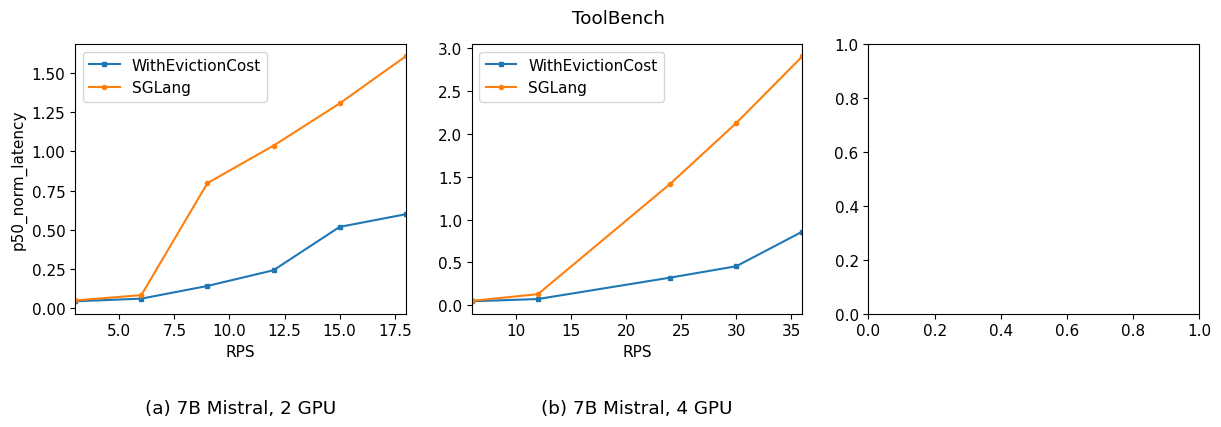

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(14.5, 3.5))
y_column = 'p50_norm_latency'

df_2r = plot_utils.read_e2e_csv_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/2r_toolbench/exp.csv')
for name, group in df_2r:
    ax[0].plot(group['rps'], group[y_column],
               **plot_utils.policy_mapping[':'.join(name)])
    ax[0].set_xlim(3, 18)
    ax[0].set_xlabel('RPS')
    ax[0].legend()
    ax[0].set_title('(a) 7B Mistral, 2 GPU', y=-0.4)
    
df_4r = plot_utils.read_e2e_csv_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/4r_toolbench/exp.csv')
for name, group in df_4r:
    ax[1].plot(group['rps'], group[y_column],
               **plot_utils.policy_mapping[':'.join(name)])
    ax[1].set_xlim(6, 36)
    ax[1].set_xlabel('RPS')
    ax[1].legend()
    ax[1].set_title('(b) 7B Mistral, 4 GPU', y=-0.4)
    
# df_8r = plot_utils.read_e2e_csv_metrics('/mnt/ssd1/alm-os/sglang_multi_model/newest_scheduler/8r_toolbench/exp.csv')
# for name, group in df_8r:
#     ax[2].plot(group['rps'], group[y_column],
#                **plot_utils.policy_mapping[':'.join(name)])
#     ax[2].set_xlim(12, 72)
#     ax[2].set_xlabel('RPS')
#     ax[2].legend()
#     ax[2].set_title('(b) 7B Mistral, 8 GPUs', y=-0.4)
    
ax[0].set_ylabel(y_column)
fig.suptitle('ToolBench')
plt.show()

Text(0, 0.5, 'p50_norm_latency')

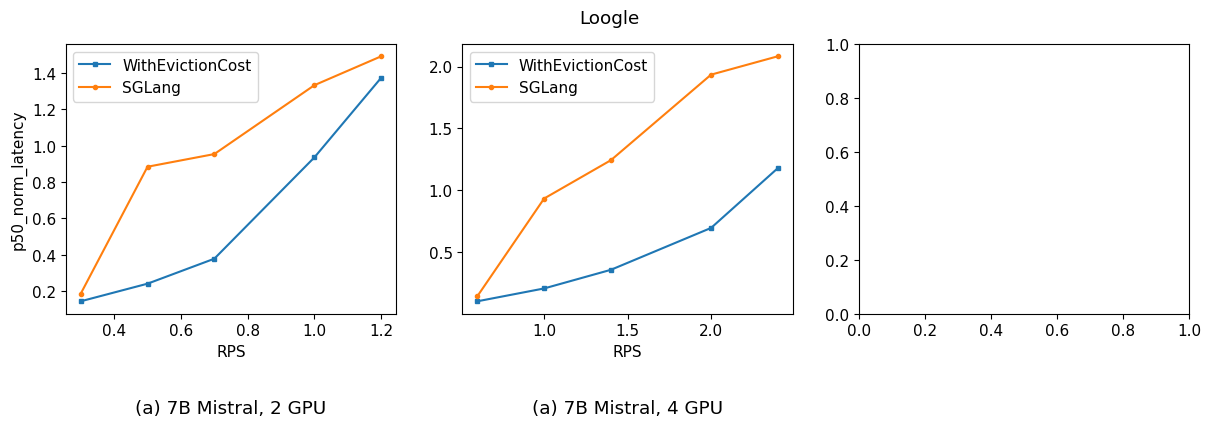

In [5]:
y_column = 'p50_norm_latency'

fig, ax = plt.subplots(1, 3, figsize=(14.5, 3.5))
df_2r = plot_utils.read_e2e_csv_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/2r_loogle_limited/exp.csv')
for name, group in df_2r:
    ax[0].plot(group['rps'], group[y_column],
               **plot_utils.policy_mapping[':'.join(name)])
    # ax[0].set_xlim(3, 18)
    ax[0].set_xlabel('RPS')
    ax[0].legend()
    ax[0].set_title('(a) 7B Mistral, 2 GPU', y=-0.4)
    
df_4r = plot_utils.read_e2e_csv_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/4r_loogle_limited/exp.csv')
for name, group in df_4r:
    ax[1].plot(group['rps'], group[y_column],
               **plot_utils.policy_mapping[':'.join(name)])
    # ax[0].set_xlim(3, 18
    ax[1].set_xlabel('RPS')
    ax[1].legend()
    ax[1].set_title('(a) 7B Mistral, 4 GPU', y=-0.4)

fig.suptitle('Loogle')
ax[0].set_ylabel(y_column)

In [6]:
def plot_all_metrics(fpath, ax, y_columns):
    df = plot_utils.read_e2e_csv_metrics(fpath)
    for i, y_column in enumerate(y_columns):
        for name, group in df:
            ax[i].plot(group['rps'], group[y_column], **plot_utils.policy_mapping[':'.join(name)])
            ax[i].set_xlabel('RPS')
            ax[i].legend()
            ax[i].set_title(y_column)

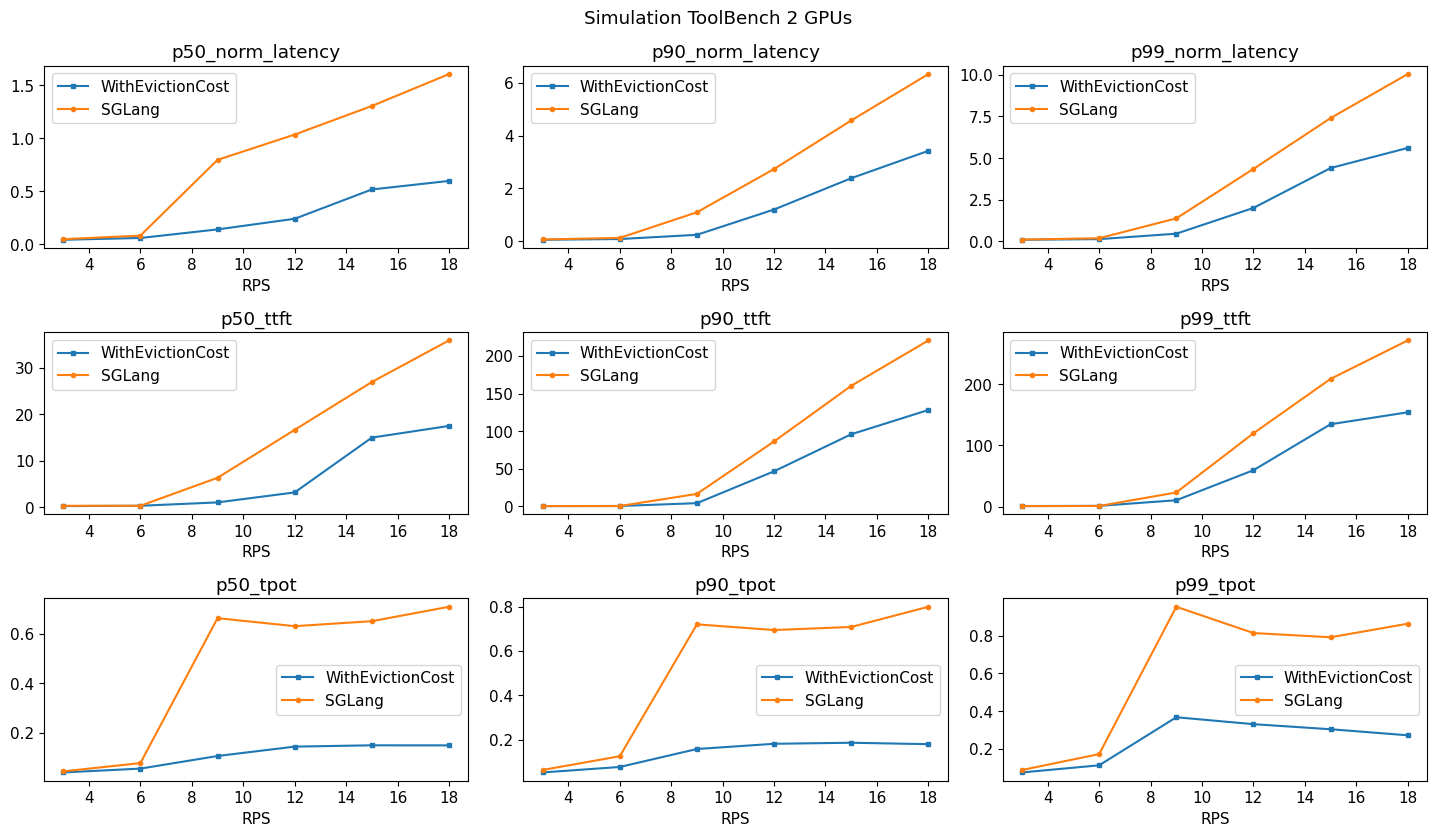

In [18]:
fig, ax = plt.subplots(3, 3, figsize=(14.5, 8.5))
y_columns = ['p50_norm_latency', 'p90_norm_latency', 'p99_norm_latency']
y_columns1 = ['p50_ttft', 'p90_ttft', 'p99_ttft']
y_columns2 = ['p50_tpot', 'p90_tpot', 'p99_tpot']
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/2r_toolbench/exp.csv', ax[0], y_columns)
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/2r_toolbench/exp.csv', ax[1], y_columns1)
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/2r_toolbench/exp.csv', ax[2], y_columns2)
fig.suptitle('Simulation ToolBench 2 GPUs')
plt.tight_layout()

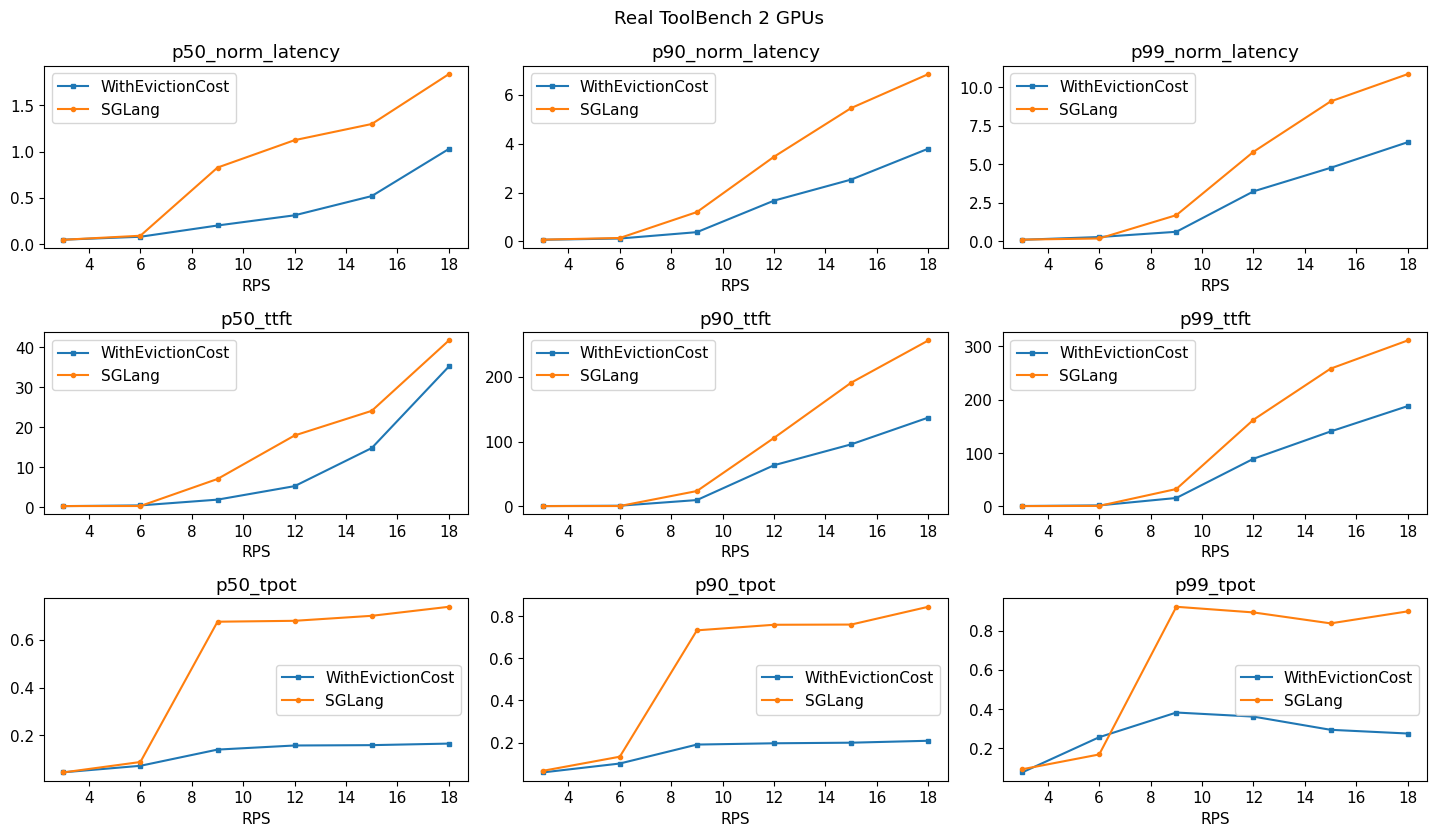

In [19]:
fig, ax = plt.subplots(3, 3, figsize=(14.5, 8.5))
y_columns = ['p50_norm_latency', 'p90_norm_latency', 'p99_norm_latency']
y_columns1 = ['p50_ttft', 'p90_ttft', 'p99_ttft']
y_columns2 = ['p50_tpot', 'p90_tpot', 'p99_tpot']
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/real_ckpt_all_in_one/2r_toolbench/exp.csv', ax[0], y_columns)
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/real_ckpt_all_in_one/2r_toolbench/exp.csv', ax[1], y_columns1)
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/real_ckpt_all_in_one/2r_toolbench/exp.csv', ax[2], y_columns2)
fig.suptitle('Real ToolBench 2 GPUs')
plt.tight_layout()

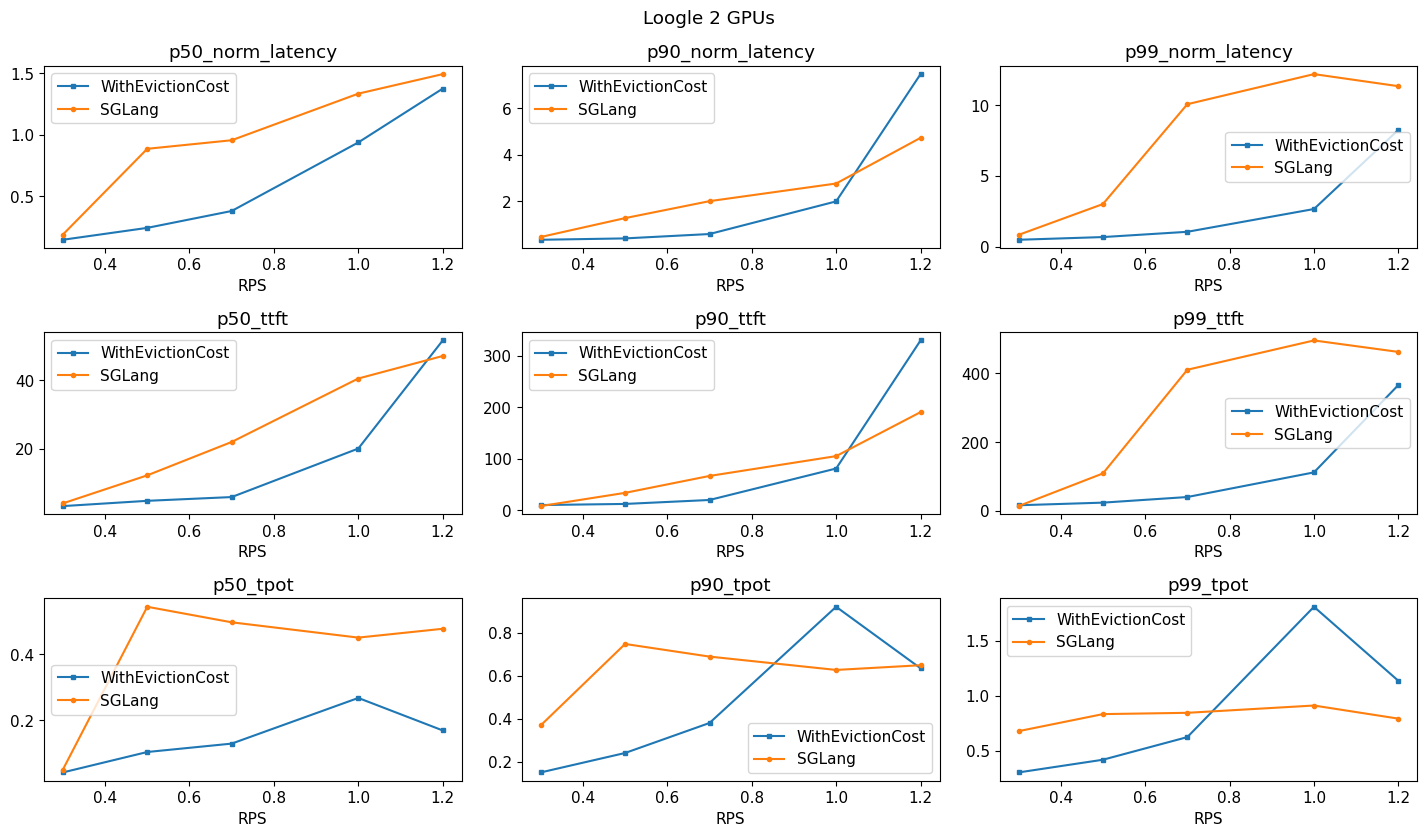

In [8]:
fig, ax = plt.subplots(3, 3, figsize=(14.5, 8.5))
y_columns = ['p50_norm_latency', 'p90_norm_latency', 'p99_norm_latency']
y_columns1 = ['p50_ttft', 'p90_ttft', 'p99_ttft']
y_columns2 = ['p50_tpot', 'p90_tpot', 'p99_tpot']
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/2r_loogle_limited/exp.csv', ax[0], y_columns)
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/2r_loogle_limited/exp.csv', ax[1], y_columns1)
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/2r_loogle_limited/exp.csv', ax[2], y_columns2)
fig.suptitle('Loogle 2 GPUs')
plt.tight_layout()

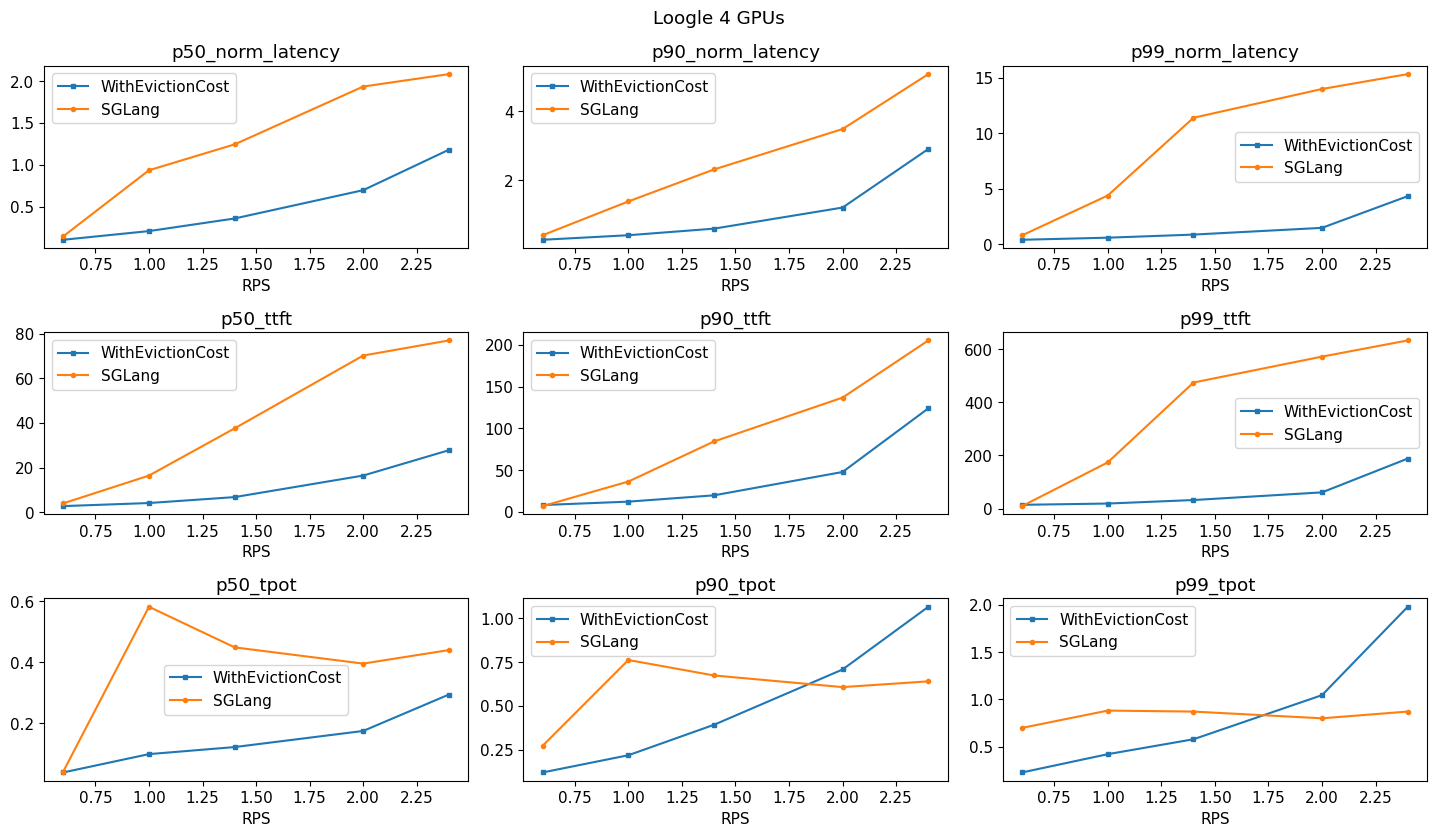

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(14.5, 8.5))
y_columns = ['p50_norm_latency', 'p90_norm_latency', 'p99_norm_latency']
y_columns1 = ['p50_ttft', 'p90_ttft', 'p99_ttft']
y_columns2 = ['p50_tpot', 'p90_tpot', 'p99_tpot']
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/4r_loogle_limited/exp.csv', ax[0], y_columns)
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/4r_loogle_limited/exp.csv', ax[1], y_columns1)
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/4r_loogle_limited/exp.csv', ax[2], y_columns2)
fig.suptitle('Loogle 4 GPUs')
plt.tight_layout()

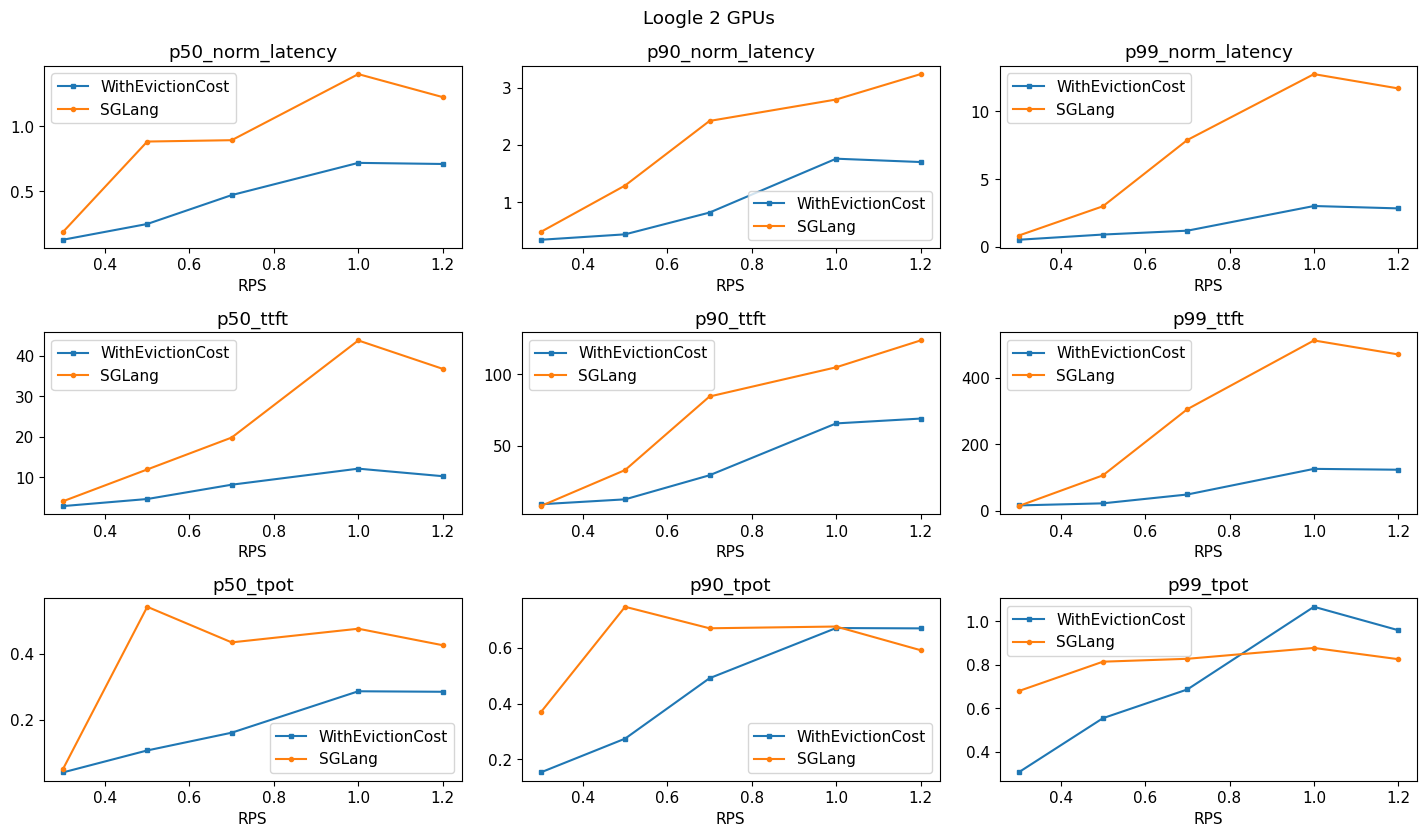

In [10]:
fig, ax = plt.subplots(3, 3, figsize=(14.5, 8.5))
y_columns = ['p50_norm_latency', 'p90_norm_latency', 'p99_norm_latency']
y_columns1 = ['p50_ttft', 'p90_ttft', 'p99_ttft']
y_columns2 = ['p50_tpot', 'p90_tpot', 'p99_tpot']
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/2r_loogle_lpm_ours/exp.csv', ax[0], y_columns)
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/2r_loogle_lpm_ours/exp.csv', ax[1], y_columns1)
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/2r_loogle_lpm_ours/exp.csv', ax[2], y_columns2)
fig.suptitle('Loogle 2 GPUs')
plt.tight_layout()

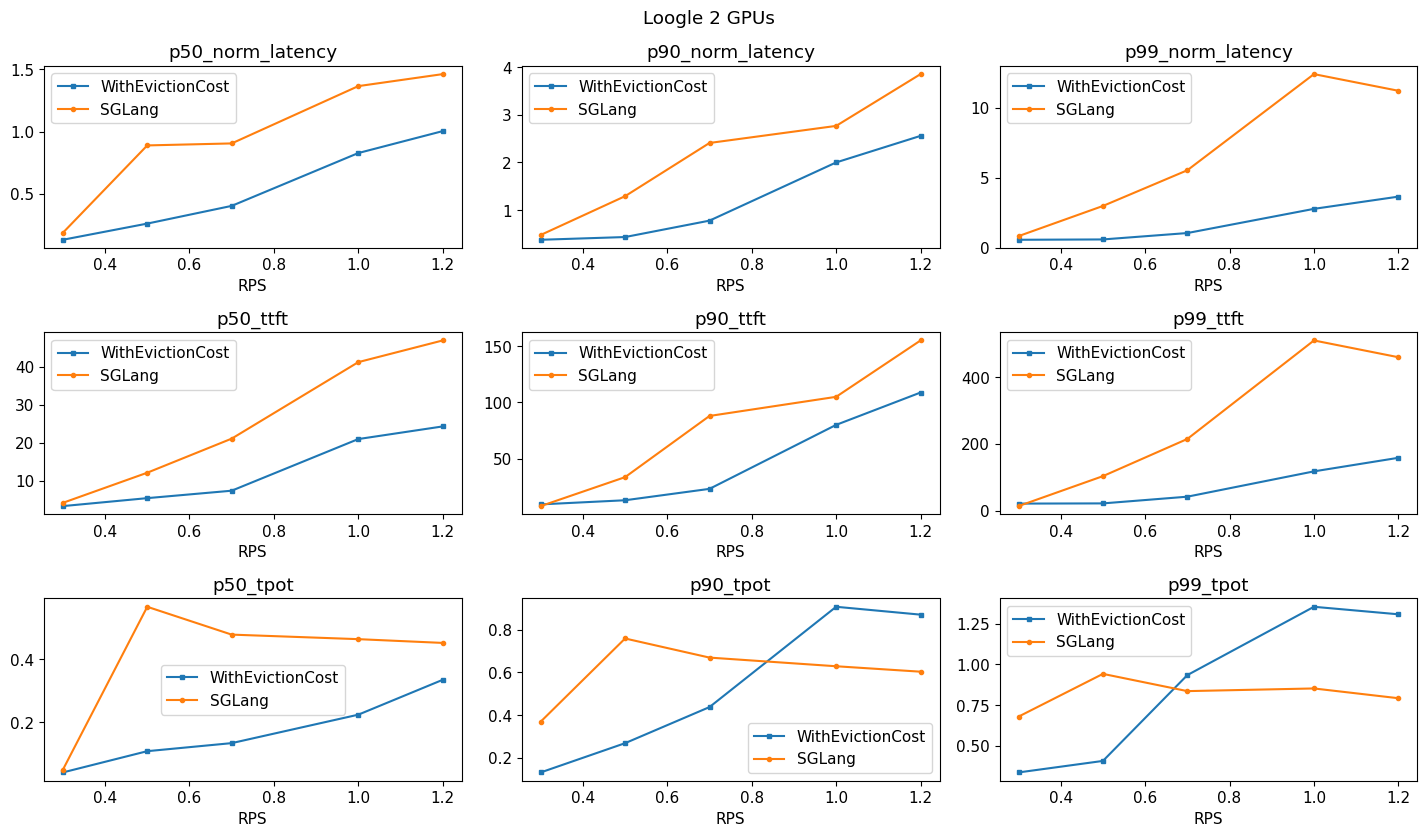

In [11]:
fig, ax = plt.subplots(3, 3, figsize=(14.5, 8.5))
y_columns = ['p50_norm_latency', 'p90_norm_latency', 'p99_norm_latency']
y_columns1 = ['p50_ttft', 'p90_ttft', 'p99_ttft']
y_columns2 = ['p50_tpot', 'p90_tpot', 'p99_tpot']
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/2r_loogle_ours_k_100_mpq/exp.csv', ax[0], y_columns)
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/2r_loogle_ours_k_100_mpq/exp.csv', ax[1], y_columns1)
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/2r_loogle_ours_k_100_mpq/exp.csv', ax[2], y_columns2)
fig.suptitle('Loogle 2 GPUs')
plt.tight_layout()

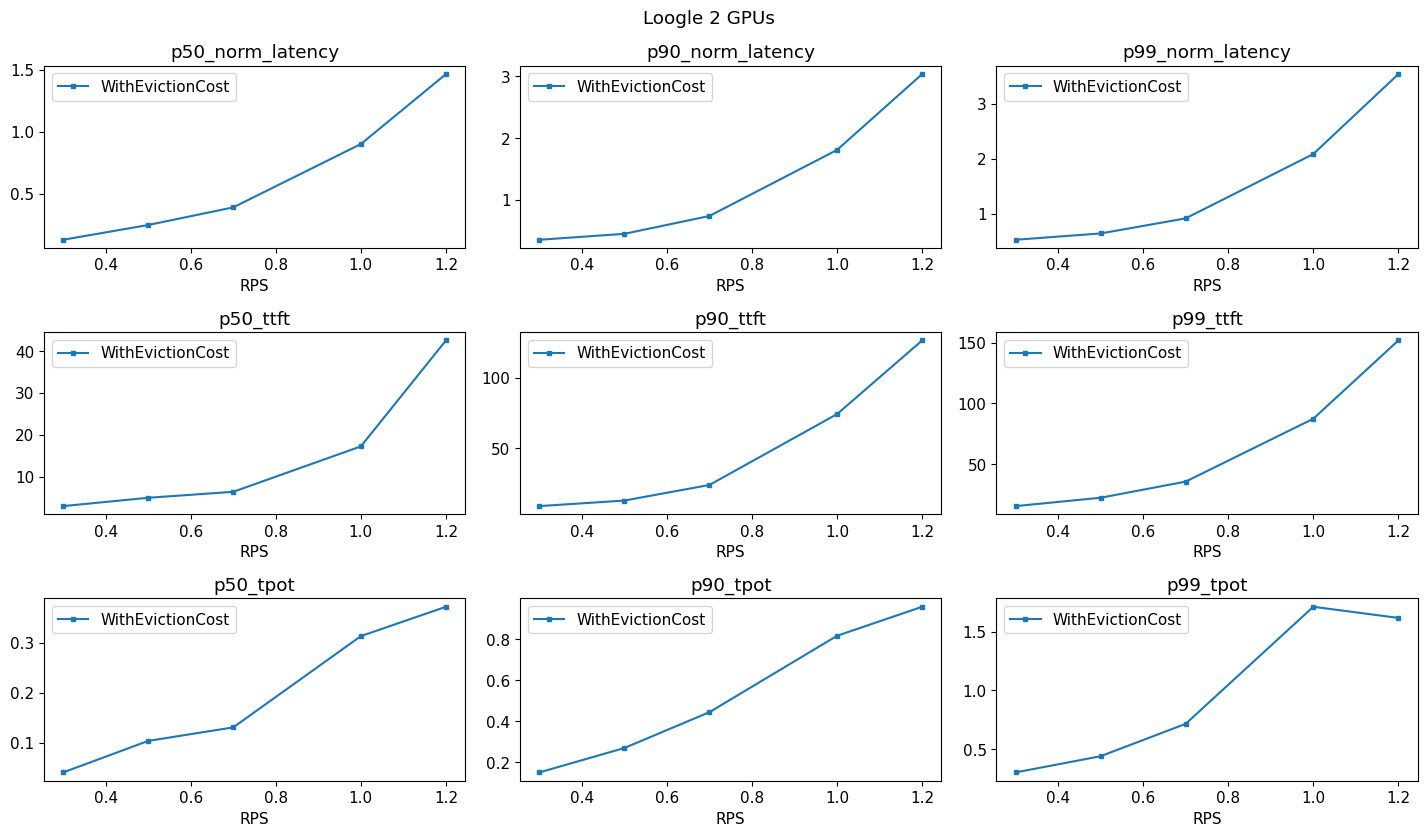

In [12]:
fig, ax = plt.subplots(3, 3, figsize=(14.5, 8.5))
y_columns = ['p50_norm_latency', 'p90_norm_latency', 'p99_norm_latency']
y_columns1 = ['p50_ttft', 'p90_ttft', 'p99_ttft']
y_columns2 = ['p50_tpot', 'p90_tpot', 'p99_tpot']
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/2r_loogle_ours_k_5_mpq/exp.csv', ax[0], y_columns)
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/2r_loogle_ours_k_5_mpq/exp.csv', ax[1], y_columns1)
plot_all_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/2r_loogle_ours_k_5_mpq/exp.csv', ax[2], y_columns2)
fig.suptitle('Loogle 2 GPUs')
plt.tight_layout()

Text(0, 0.5, 'p50_ttft')

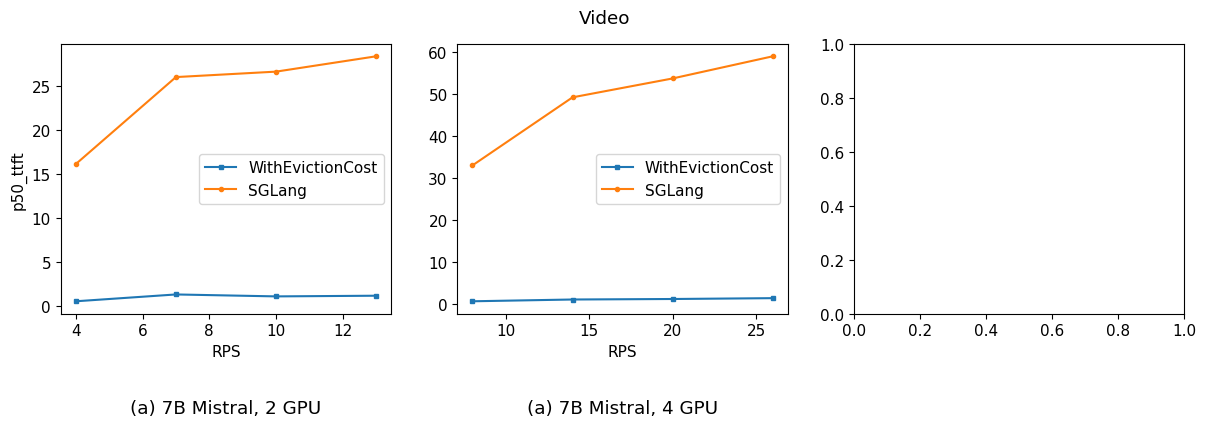

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(14.5, 3.5))
y_column = 'p50_ttft'

    
df_2r = plot_utils.read_e2e_csv_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/2r_videoQA/exp.csv')
for name, group in df_2r:
    ax[0].plot(group['rps'], group[y_column],
               **plot_utils.policy_mapping[':'.join(name)])
    # ax[0].set_xlim(3, 18)
    ax[0].set_xlabel('RPS')
    ax[0].legend()
    ax[0].set_title('(a) 7B Mistral, 2 GPU', y=-0.4)
    
df_4r = plot_utils.read_e2e_csv_metrics('/mnt/ssd1/alm-os/sglang_multi_model/ckpt_all_in_one/4r_videoQA/exp.csv')
for name, group in df_4r:
    ax[1].plot(group['rps'], group[y_column],
               **plot_utils.policy_mapping[':'.join(name)])
    # ax[0].set_xlim(3, 18)
    ax[1].set_xlabel('RPS')
    ax[1].legend()
    ax[1].set_title('(a) 7B Mistral, 4 GPU', y=-0.4)
    

fig.suptitle('Video')
ax[0].set_ylabel(y_column)